# Linear Regression without using Scikit Learn

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading data
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [13]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values 
Y = data['Brain Weight(grams)'].values

In [14]:
#Finding Mean
mean_x= np.mean(X)
mean_y= np.mean(Y)

#Finding total number of values
n= len(X)

#Using the formula to calculate m & c in y= mx+c
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
m= numer / denom
c = mean_y - (m * mean_x)
print(m)
print(c)

0.26342933948939945
325.57342104944223


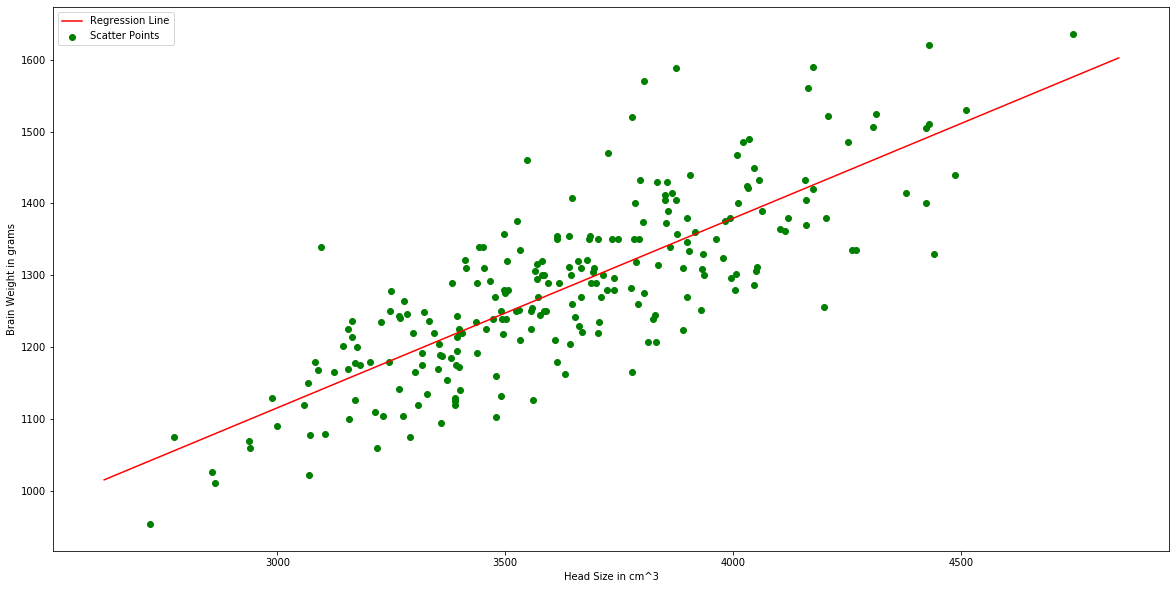

In [15]:
# Plotting vaues and regression lines

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = m * x + c
# FUNCTION OF LINSPACE
#Return evenly spaced numbers over a specified interval.
#Returns `num` evenly spaced samples, calculated over the
#interval [`start`, `stop`].

#plotting line
plt.plot(x, y, color='red', label='Regression Line')
#plotting scatter points
plt.scatter(X, Y, c='green', label='Scatter Points')
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [16]:
#Calculating R squared error
nu = 0
de = 0
for i in range(n):
    y_pred = m * X[i] + c
    de += (Y[i] - mean_y) ** 2
    nu += (Y[i] - y_pred) ** 2
r2 = 1-(nu/de)
print(r2)
#print(nu)
#print(de)

0.6393117199570003


# Using Scikit Learn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n, 1))
#creating model
lr = LinearRegression()
#Fitting training data
lr.fit(X, Y)
# Y Prediction
Y_pred = lr.predict(X)

# Calculating r2 Score

r2_score = lr.score(X, Y)

print(r2_score)

0.639311719957


In [10]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [19]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators= 10, random_state= 0)
reg.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)